# Exploratory Data Analysis - Sports
We are going to perform Exploratory Data Analysis on IPL dataset. Indian Premier League(IPL) is the most attended cricket league in the world. It is contested between March to May every year where each team represent different states in India.

In [31]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset
**Dataset Description**<br>
**id**: Unique number given to each row.
**season**:IPL season in which a particular match was played.
**city**: City names in which the match was played.
**date**: Match date.
**team1, team2**: Teams that played against each other.
**toss_winner**: Team that won the toss.
**toss_decision**:Whether the winning team choose batting or bowling.
**result**: the result of the match.
**dl_applied**: whether dl is applied(1) or not(0).
**winner**: winner of he match.
**win_by_runs**: margin win.
**Player_of_match**: man of the match can be from any of the team.
**venue**: stadium where it was played.
**umpire1, umpire2, umpire3**: umpire names.

In [134]:
matches=pd.read_csv("./matches.csv")

In [135]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [136]:
deliveries=pd.read_csv("./deliveries.csv")

In [139]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [138]:
df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Data Analysis and Visualization

In [140]:
df.shape

(179078, 39)

The dataset have 179078 rows and 39 columns

In [141]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [142]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#### Calculating total number of cities, teams, season and venues

In [144]:
#nunique() count the number of unique values in the dataset excluding the null values while unique() consider them
print("Total Number of Teams:  ",df['team1'].nunique())
print("Total Number of Seasons:",df['season'].nunique())
print("Total Number of Venues: ",df['venue'].nunique())
print("Total Number of Cities: ",df['city'].nunique())

Total Number of Teams:   15
Total Number of Seasons: 12
Total Number of Venues:  41
Total Number of Cities:  32


There are total 15 teams which played 12 seasons in 32 different cities at 42 venues!!

In [40]:
# Checking the 32 cities name where the game is played
cities=df['city'].unique()
print(cities)

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


Banglore and Bengaluru are same therefore replacing Bangalore with Bengaluru

In [41]:
df['city']=df['city'].replace('Bangalore','Bengaluru')
cities=df['city'].unique()
print(cities)

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bengaluru' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali']


#### Exploring the matches with not even one umpire

In [42]:
df[(df['umpire1'].isnull())&(df['umpire2'].isnull())&(df['umpire3'].isnull())][['date','team1','team2','winner']]

,date,team1,team2,winner
id,,,,
5,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
11413,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


There were 2 matches played in the history of IPL where there was not even one umpire.

#### Exploring the best Players 

In [46]:
#Lets check the top players who became the player of the match
print("The number of players who won the title Player of the match: ",df['player_of_match'].nunique())

The number of players who won the title Player of the match:  226


In [49]:
#Printing the top 10 players
df['player_of_match'].value_counts().sort_values(ascending=False).head(10)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Chris Gayle, an inernational player, is the top player of the IPL.

In [52]:
##Checking the matches that CH Gayle have won when he was player of the match
df[df['player_of_match']=='CH Gayle'][['date','team1','team2','winner']]

,date,team1,team2,winner
id,,,,
20,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore
123,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
258,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
280,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore
283,2011-05-08,Kochi Tuskers Kerala,Royal Challengers Bangalore,Royal Challengers Bangalore
291,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
302,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore
306,2011-05-27,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
329,2012-04-17,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore


We can observe, till 2017 CH Gayle was in Royal Challengers Bangalore and then he was bought by Kings XI Punjab. There was only one match where he was man of the match and was not the winner in season 2009 against Kolkata Knight Riders.

#### Discovering the Biggest Matches in IPL
We know that the team is strong if the team has won by either maximum number of wickets or runs.

       win_by_wickets  win_by_runs
count      756.000000   756.000000
mean         3.350529    13.283069
std          3.387963    23.471144
min          0.000000     0.000000
25%          0.000000     0.000000
50%          4.000000     0.000000
75%          6.000000    19.000000
max         10.000000   146.000000


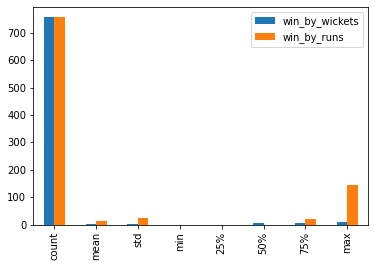

In [57]:
print(df[['win_by_wickets','win_by_runs']].describe())

df[['win_by_wickets','win_by_runs']].describe().plot(kind='bar')
plt.show()

The maximum win_by_wicket is 10 and win_by_run  is 146

In [63]:
#To check which Team win_by_wicket==10
df[df['win_by_wickets']==10][['date','team1','team2','winner']].reset_index(drop=True)

,date,team1,team2,winner
0,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
1,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
2,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers
3,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
4,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore
5,2011-05-20,Mumbai Indians,Rajasthan Royals,Rajasthan Royals
6,2012-05-20,Rajasthan Royals,Mumbai Indians,Mumbai Indians
7,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
8,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
9,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


There are 11 total teams who won by 10 wickets. RCB have won 3 times in total by 10 wickets!!

In [65]:
#To check which Team win_by_runs==146
df[df['win_by_runs']==146][['date','team1','team2','winner']]

,date,team1,team2,winner
id,,,,
44,2017-05-06,Mumbai Indians,Delhi Daredevils,Mumbai Indians


It's Mumbai Indians who have won by 146 runs against Delhi Daredevils in 2017.

In [73]:
#Let's check the matches where RCB won by either more than 100 runs or 7 wickets.
df[(df['win_by_runs']>100) | (df['win_by_wickets']>7)][['date','season','team1','team2','winner']]

,date,season,team1,team2,winner
id,,,,,
3,2017-04-07,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
6,2017-04-09,2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad
8,2017-04-10,2017,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab
11,2017-04-13,2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
22,2017-04-20,2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians
...,...,...,...,...,...
11147,31/03/19,2019,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
11312,07/04/19,2019,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders
11319,13/04/19,2019,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore


#### Exploring Match Result

In [74]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

There were 743 total normal results i.e. only one team was the winner, 9 matches when there was a tie, and 4 matches when result cannot be concluded.

In [82]:
#Printing the season when tie and no result occured in the match
print('Result= tie')
print(df[df['result']=='tie'][['season','team1','team2']])
print()

print('Result= no result')
print(df[df['result']=='no result'][['season','team1','team2']])

Result= tie
       season                        team1                        team2
id                                                                     
34       2017                Gujarat Lions               Mumbai Indians
126      2009             Rajasthan Royals        Kolkata Knight Riders
190      2010              Kings XI Punjab          Chennai Super Kings
388      2013  Royal Challengers Bangalore          Sunrisers Hyderabad
401      2013             Delhi Daredevils  Royal Challengers Bangalore
476      2014             Rajasthan Royals        Kolkata Knight Riders
536      2015             Rajasthan Royals              Kings XI Punjab
11146    2019        Kolkata Knight Riders               Delhi Capitals
11342    2019               Mumbai Indians          Sunrisers Hyderabad

Result= no result
       season                        team1                        team2
id                                                                     
301      2011             Delhi D

#### Analysing which Season was most popular

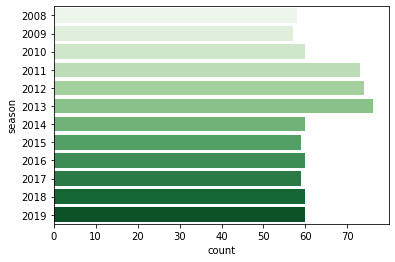

In [86]:
sns.countplot(y=df['season'],palette='Greens')
plt.show()

The graph shows that 2013 had most matches than any season. 

#### Exploring the top venues for the IPL

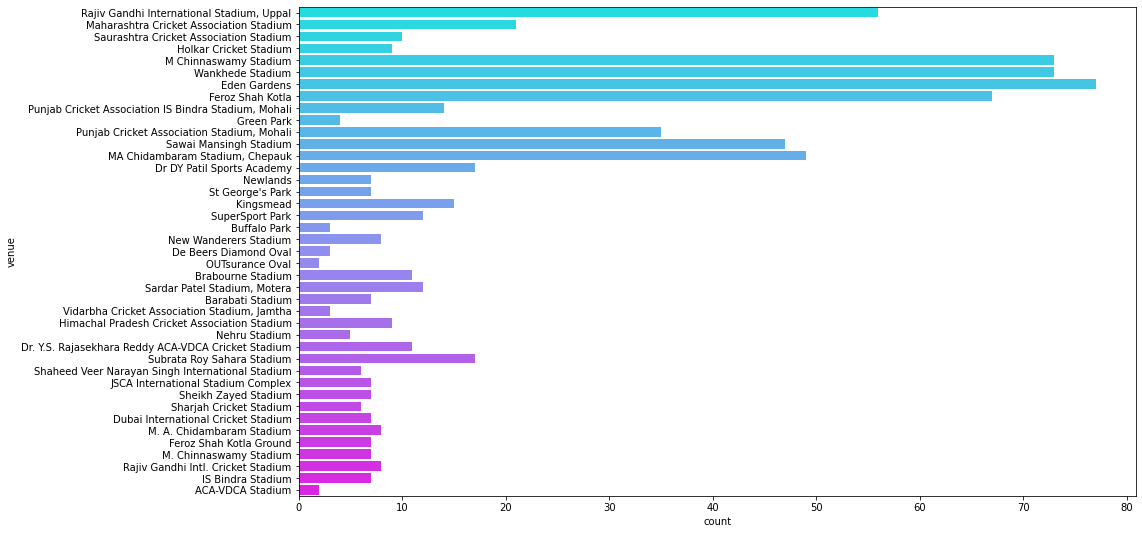

In [94]:
plt.figure(figsize=(15,9))
sns.countplot(y=df['venue'],palette='cool')
plt.show()

Eden Garden is the most popular venue often called as 'Home Of Indian Cricket'.

#### Exploring the cities in which a particular season was held at

In [120]:
def city(season):
    cities=df.groupby(['city','season'])['id'].agg('count').reset_index()
    cities.rename(columns={'id':'count'},inplace=True)
    return cities[cities['season']==season].sort_values(by='count',ascending=False)
city(2018)

,city,season,count
89,Kolkata,2018,9
102,Mumbai,2018,9
13,Bengaluru,2018,7
47,Delhi,2018,7
63,Hyderabad,2018,7
73,Jaipur,2018,7
111,Pune,2018,6
67,Indore,2018,4
91,Mohali,2018,3
33,Chennai,2018,1


So, in 2019 season Mumbai and Kolkata are the cities where most matches were held.

#### COmparison between toss winners and winners of the match

If there is any relation between winning the toss and winning the match

In [122]:
#Calculating the totla number of matches won by a team
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Mumbai Indian have won most of the matches(109), followed by Chennai Super Kings(100) and Kolkata Knight Riders(92).

In [123]:
#Analysing the relation between the two
not_same=df[df['winner'] != df['toss_winner']]
same=df[df['winner'] == df['toss_winner']]

In [126]:
#Calculating the percentage
print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/df.shape[0], 4) *100)
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/df.shape[0], 2) * 100)

Percentage of matches where toss winner is not same as winner:  48.02
Percentage of matches where toss winner is same as winner:  52.0


This isn't a big difference that means winning the toss doesn't makes the team a winner.

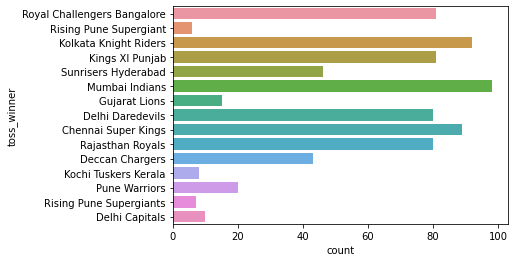

In [129]:
# Teams with most toss wins
sns.countplot(y=df['toss_winner'])
plt.show()

RCB have won most of the tosses.